In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

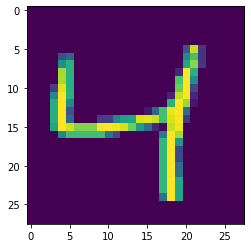

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

- Uses a sequential model but constructs it using the Sequential() API.
- Starts with a 'Flatten' layer that converts 28x28 image into a 784 dimensional vector
- Then there are two dense layers with 128 and 32 units both using ReLU activation
- Finally, there's an output dense layer with 10 units and softmax activation

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

- Configures the model for training 
- Loss function: sparse_categorical_crossentropy is commonly used for multi class classification problems where the labels are integers (not one hot encoded)
- Optimizer: Adam popular optiization algorithm that adapts the learning rate for each parameter individually
- Metrics: Accuracy is a common metric for classification tasks.



In [13]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.9192 - val_loss: 0.1397 - val_accuracy: 0.9578
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1185 - accuracy: 0.9641 - val_loss: 0.1303 - val_accuracy: 0.9624
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0956 - val_accuracy: 0.9699
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.1009 - val_accuracy: 0.9700
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.1163 - val_accuracy: 0.9665
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0980 - val_accuracy: 0.9726
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0965 - val_accuracy:

validation_split=0.2 means that 20% of training data will be used as validation set while remaining 80% used for actual training

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


- y_prob will hold the predicted class probabilities for each sample in 'X_test'
  

In [23]:
y_prob[0]

array([5.8751798e-15, 8.6279696e-17, 7.7229473e-17, 1.4490369e-15,
       4.3639938e-17, 7.0181527e-18, 1.0411861e-28, 1.0000000e+00,
       2.5994248e-18, 6.3962019e-13], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1)


In [24]:
y_pred[0]

7

In [25]:
y_prob[1]

array([1.2297213e-14, 6.9532397e-10, 1.0000000e+00, 2.5679259e-14,
       3.7551281e-33, 1.7431055e-14, 1.3263132e-13, 1.4558764e-27,
       1.3317303e-13, 1.1999163e-21], dtype=float32)

In [26]:
y_pred[1]

2

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9762

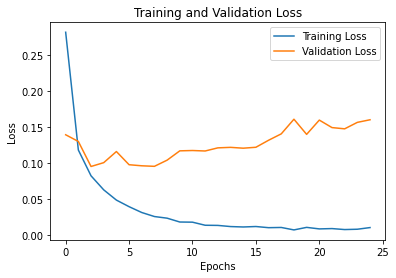

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

By plotting both the training loss and the validation loss on the same graph, you can observe how the model's performance changes during training. A common scenario to look for is that the training loss decreases over epochs, indicating that the model is learning from the training data. However, if the validation loss starts increasing after some epochs while the training loss continues to decrease, it might suggest overfitting, where the model is starting to memorize the training data instead of generalizing well.

- Training loss- measures how well the model fits the training data
- Validation loss - Evaluates how well the model generalizes to new unseen data

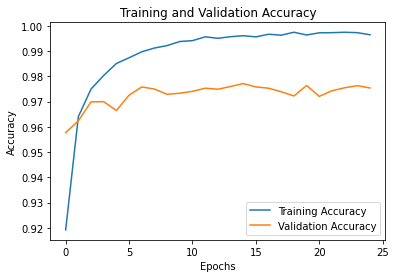

In [31]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Add legend
plt.legend()

# Show the plot
plt.show()

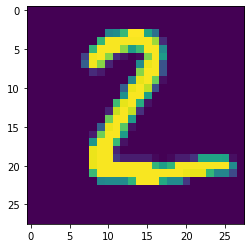

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 30ms/step


array([2], dtype=int64)